In [4]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [129]:
def make_train_test_split(source1:str, source2:str, test_size=0.15, base_path="data/goldstandard/"):
    """This method makes the train test split. Expects input file name to have alphabetically ordered source names and conform to the naming scheme"""
    if test_size >=1 or test_size < 0:
        raise ValueError("test_size has to be in (0,1)")
    
    
    in_path = f"archive_and_analysis/gs_{source1}_{source2}_cat.csv"
    out_path_train = f"{source1}_{source2}_train.csv"
    out_path_test = f"{source1}_{source2}_test.csv"

    df = pd.read_csv(base_path + in_path, delimiter=";", header=None)


    #relabel column 2 to TRUE,FALSE for the Boolean.readBool Function
    df[2] = df[2].map(lambda x : "TRUE" if x == 1 else "FALSE")

    X_train, X_test= train_test_split(df, test_size=test_size, random_state=42, stratify=df[3], shuffle=True)

    #don't print category to conform to expected file layout
    X_train[[0,1,2]].to_csv(base_path + out_path_train, header=None, index=False)
    X_test[[0,1,2]].to_csv(base_path + out_path_test, header=None, index=False)

In [130]:
make_train_test_split("dbpedia", "forbes", test_size=0.25)
#make_train_test_split("dbpedia", "dw")
#make_train_test_split("dw", "forbes")
make_train_test_split("dbpedia", "kaggle", test_size=0.25)

In [40]:
sim = 0.8
thresh = 0.7

sim + pow(sim - thresh,3)

0.801

In [42]:
import math
sim + pow(2, sim+thresh)-1

2.6284271247461906

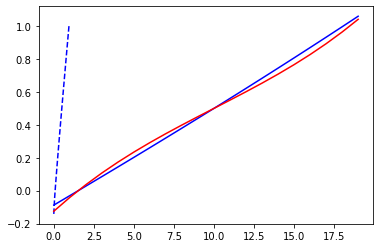

In [126]:
import numpy as np
import matplotlib.pyplot as plt

sim = 0.85
thresh = 0.5

# evenly sampled time at 200ms intervals
X = np.arange(0., 1., 0.05)

x3 = [boostX3(x,thresh) for x in X]
sq = [boostSqrt(x,thresh) for x in X]
expo = [boostExp(x,thresh) for x in X]

# red dashes, blue squares and green triangles
plt.plot(X, sq, 'b--', expo, 'b-', x3, 'r-')
plt.show()

In [127]:
[boostExp(x,thresh) for x in X]

[-0.08786796564403573,
 -0.030387145608156182,
 0.02735748497655971,
 0.08537522936902525,
 0.1436757189068707,
 0.20226892457611434,
 0.2611651689888373,
 0.32037513878324914,
 0.37990989746104226,
 0.4397808986774537,
 0.5,
 0.5605794771524133,
 0.621532038760888,
 0.6828708416203535,
 0.7446095064991106,
 0.8067621345008164,
 0.8693433240034749,
 0.9323681881957788,
 0.9958523732318683,
 1.0598120770263189]

In [125]:
def boostX3(sim, thresh):
    return sim + math.pow(sim - thresh, 3)

def boostExp(sim, thresh):
    return sim + (pow(2, sim-thresh)-1)/10*3

def boostSqrt(sim, thresh):
    return sim + (math.sqrt(sim) - math.sqrt(thresh))/5